2.작업형 제2유형

01 다음은 선호하는 메타버스 유형에 대한 데이터 세트이다. 주어진 훈련 데이터 세트를 활용하여 선호하는 메타버스 유형을 분류하는 모델을 구축하고 테스트 데이터 세트를 대상으로 분류한 결과를 csv 파일로 제출하시오.

※ 결과 제출 양식 :    제출한 예측값의 macro_f1 결과를 통해 영역별 배점에 따라 최종 점수가 반영될 예정

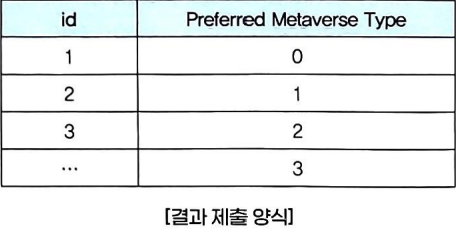

In [ ]:
# 데이터 파일 읽기
import pandas as pd

train_file = '/content/06.02.01-Metaverse Training Data.csv'
X_test_file = '/content/06.02.02-Metaverse Testing Data_x.csv'

train = pd.read_csv(train_file)
X_test = pd.read_csv(X_test_file)

# 사용자 코딩
# 답안 제출 참고
# 아래 코드 예측변수와 수험번호를 개인별로 변경하여 활용
# pd.DataFrame({'index':X_test.index, 'y_pred'; pred}).to_csv('0000000000.csv', index=False)

# print(train.head())
# print(train.info())
# print(X_test.head())
# print(X_test.info())

# 2) 데이터 전처리
# info()함수로 데이터의 행 수, 컬럼별 결측치 수와 데이터 타입 등을 확인해 본다.
# id 값은 무의미하므로 학습 시 제외해야 한다.
# print(train.info())
# print(X_test.info())

# 각 컬럼에 결측치가 얼마나 존재하는지 isnull 함수를 활용해서 구해보자. 데이터프레임에
# .isnull.sum()을 적용하면 각 컬럼별 결측치 수를 구할 수 있다.
# print(train.isnull().sum())
# print(X_test.isnull().sum())

# 위에서 데이터 탐색한 결과를 바탕으로 변수들을 불필요한 변수(COL_DEL), 수치형 변수(COL_NUM),
# 범주형 변수(COL_CAT), 종속변수(COL_Y)로 나누도록 하자.
# print(train.columns)
# Age, Anual Salary : 수치형 변수
# Gender, Education, Occupation Type, Residence Type : 범주형 변수
# Preferred Metaverse Type : 종속변수

COL_DEL = [id]
COL_NUM = ['Age', 'Annual Salary']
COL_CAT = ['Gender', 'Education', 'Occupation Type', 'Residence Type']
COL_Y = ['Preferred Metaverse Type']

# 3) 데이터 모형 구축
# sklearn 패키지의 train_test_split 함수로 X_train, y_train을 7:3으로 분할하여
# 각각 학습 데이터, 검증 데이터로 사용한다. 분류 모델을 만들어야 하므로
# stratify 옵션을 사용한다.
from sklearn.model_selection import train_test_split
X_train = train[COL_CAT + COL_NUM]
y_train = train[COL_Y]
X_tr, X_val, y_tr, y_val = train_test_split(X_train
                                            , y_train.values.ravel()
                                            , test_size = 0.3
                                            , stratify = y_train.values.ravel())
# print(X_tr.head())
# print(y_tr[:2])

# 다음으로 수치형 변수에 대해 데이터 스케일링을 수행하도록 하자
# 데이터스케일링은 수치형 변수 간의 값의 크기 차이가 크게 날 때 수행한다.
# 이는 단순히 값의 차이 때문에 y값을 결정하는데 큰 영향을 주는 것을 방지하기 위해서
# 수행하는 작업이다.
# sklearn 패키지 StandardScaler 함수를 사용하여 데이터 표준화를 수행하도록 하자.
# 이 때, 데이터 누수를 방지하기 위해  scaler의 fitting은 학습용 데이터 X_tr만 사용하고,
# X_tr, X_val, X_test 세 데이터 모두에 적용하여 스케일링시켜야 하는 것에 주의해야 한다.
# print(X_tr.describe())

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_tr[COL_NUM])

X_tr[COL_NUM]   = scaler.transform(X_tr[COL_NUM])
X_val[COL_NUM]  = scaler.transform(X_val[COL_NUM])
X_test[COL_NUM] = scaler.transform(X_test[COL_NUM])

# print(X_tr[COL_NUM].head())

# 그 다음으로 범주형 변수에 대해 데이터 인코딩 수행한다.
# 그런데 Occupation Type 변수의 경우 클래스 종류가 무려 19개에 달한다.
# 일반적으로 이렇게 많은 번주를 가지는 범주형 변수는 그대로 사용하는 경우가
# 드물다. 예를 들어 데이터 탐색 과정을 거쳐 몇몇 모델을 묶은 새로운 범주형
# 파생변수를 만들어 활용할 수 있다. 시험에서는 우선 온전한 모델링 과정을 거쳐
# 최종 예측값을 생성하는 것이 목적이므로, 별도의 전처리 과정 없이 Occupation Type
# 변수는 그대로 사용하도록 한다.
# print(train.head())

from sklearn.preprocessing import LabelEncoder
X = pd.concat([X_train[COL_CAT], X_test[COL_CAT]])

# 반복문
for col in COL_CAT:
    le = LabelEncoder()
    le.fit(X[col])
    X_tr[col]   = le.transform(X_tr[col])
    X_val[col]  = le.transform(X_val[col])
    X_test[col] = le.transform(X_test[col])
    # 각 변수의 클래스 확인
    # print(col)
    # print(le.classes_)
    # print('\n')

# print(X_tr[COL_CAT].head())

# 전처리가 완료된 학습 데이터 X_tr, y_tr로 default 파라미터를 사용하는 Logistic Regression, Random Forest 모형과
# XGBoost 모형으로 모형 학습을 시킨다.
# 0) 로지스트 리그레션
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(random_state=123)
modelLR.fit(X_tr, y_tr)

# 1) 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(random_state=123)
modelRF.fit(X_tr, y_tr)

# 2) XGBoost
from xgboost import XGBClassifier
modelXGB = XGBClassifier(random_state=123)
modelXGB.fit(X_tr, y_tr)

# 4) 데이터 모형 평가
# 각 모델로 검증 데이터 X_val을 사용하여 예측값을 생성한다.
y_val_predLR = modelLR.predict(X_val)
y_val_predRF = modelRF.predict(X_val)
y_val_predXGB = modelXGB.predict(X_val)

# print(y_val_predLR)
# print(y_val_predRF)
# print(y_val_predXGB)

# 검증 데이터에 대한 평가지표는 답안 채점 기준인 macro f1-score를 사용한다.
# f1-score는 값이 높을수록 모델의 성능이 좋은 것으로 Random Forest 모형이 Logistic Reression,
# XGBoost 모형보다 더 좋은 성능을 보인다고 할 수 있다.

from sklearn.metrics import f1_score, accuracy_score

scoreLR  = f1_score(y_val, y_val_predLR, average='macro')
scoreRF  = f1_score(y_val, y_val_predRF, average='macro')
scoreXGB = f1_score(y_val, y_val_predXGB, average='macro')

# print('로지스틱 회귀: \t', scoreLR)
# print('랜덤 포레스트: \t', scoreRF)
# print('XGBoost: \t', scoreXGB)

## 참고 - metric 종류 확인
# import sklearn.metrics
# 함수 명은 알지만 파라미터 등 사용법을 모를 때 help함수를 사용하면 대충 감은 온다.
# print(help(sklearn.metrics.f1_score))

# 학습 데이터에 대한 모형 성능도 같이 확인하여 모형의 과대적합 여부를 확인해 보도록 한다.
# 함수 get_scores는 여러 모델에 대해 학습, 검증 성능을 편한게 구할 수 있도록 작성할 것이다.

def get_scores(model, X_tr, X_val, y_tr, y_yal):
    y_tr_pred = model.predict(X_tr)
    y_val_pred = model.predict(X_val)
    tr_score = f1_score(y_tr, y_tr_pred, average='macro')
    val_score = f1_score(y_val, y_val_pred, average='macro')

    return f'train : {round(tr_score, 4)}, valid: {round(val_score, 4)}'


# modelLR, modelRF, modelXGB에 대해 각각 학습, 검증 성능을 확인해 보자.
# modelLR은 학습데이터에 대한 평가지표가 0.2973, 검증 데이터의 평가지표가 0.2651로 나온다.
# 두 값 모두 성능이 매우 낮다.
# modelRF 모델은 학습 데이터에 대한 평가지표가 1.0, 검증데이터에 대한 평가지표는 0.9746
# modelXGB 모델은 학습 데이터에 대한 평가지표가 0.9997, 검증데이터에 대한 평가지표는 0.9733가 나왔다.
# modelRF의 학습용 데이터의 평가지표가 1.0을 보이기 때문에 과대적합을 의심해볼 수 있다.
# print('로지스틱 회귀: \t-', get_scores(modelLR, X_tr, X_val, y_tr, y_val))
# print('랜덤 포레스트: \t-', get_scores(modelRF, X_tr, X_val, y_tr, y_val))
# print('XGBoost: \t-', get_scores(modelXGB, X_tr, X_val, y_tr, y_val))

# 성능 개선을 위해 XGBoost 모형에서 하이퍼 파라미터를 바꿔 몇 개의 모델을 만들어 보도록 하자.
# n_estimators : 기본값은 100이며 트리 모델의 개수라고 생각하면 된다.
# max_depth : 기본값은 6이며, 트리의 최대 깊이를 뜻하며 일반적으로 3~10의 값으로 한다.
# min_child_weight : 기본값이 1이며, child에서 필요한 모든 관측치에 대한 가중치의 최소합
# 이 값보다 샘플 수가 작으면 leaf node가 된다. 너무 크게 설정하면 Under_fitting될 수 있다.
modelXGB2 = XGBClassifier(n_estimators=50, max_depth=3, min_child_weight=1, random_state=123)
modelXGB2.fit(X_tr, y_tr)

modelXGB3 = XGBClassifier(n_estimators=50, max_depth=3, min_child_weight=2, random_state=123)
modelXGB3.fit(X_tr, y_tr)

modelXGB4 = XGBClassifier(n_estimators=50, max_depth=5, min_child_weight=1, random_state=123)
modelXGB4.fit(X_tr, y_tr)

modelXGB5 = XGBClassifier(n_estimators=100, max_depth=5, min_child_weight=1, random_state=123)
modelXGB5.fit(X_tr, y_tr)

# 후보 모델 중에서 검증 성능이 높은 축에 속하고 훈련용과 검증용 데이터의 성능 차이가 심하지 않는
# XGBoost5 모델을 최종 모델로 선정하겠다.
# print('XGBoost2 \t-', get_scores(modelXGB2, X_tr, X_val, y_tr, y_val))
# print('XGBoost3 \t-', get_scores(modelXGB3, X_tr, X_val, y_tr, y_val))
# print('XGBoost4 \t-', get_scores(modelXGB4, X_tr, X_val, y_tr, y_val))
# print('XGBoost5 \t-', get_scores(modelXGB5, X_tr, X_val, y_tr, y_val))

# 최종 모델로 X_test 데이터에 대한 예측값을 생성한다. 이 때 학습 때와 동일한 변수 순서를 적용
# 해야 함에 주의한다. (COL_CAT + COL_NUM) 또한 최종 결괏값을 출력해서 문제에서 요구하는 파일 형태와
# 동일한지 꼭 확인해봐야 한다.
# 최종 결과 확인 후 문제에서 주어진 to_csv함수로 결과를 제출을 하면 된다.
pred = modelXGB.predict(X_test[COL_CAT + COL_NUM])
result = pd.DataFrame({'ID' : X_test.id, 'Preferred Metaverse Type' : pred})
# print(result.head())

# 최종 결과 확인 후 to_csv 함수로 제출
result.to_csv('00777777.csv', index=False)


